In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Import data

In [213]:
df = pd.read_csv('../../lesson-02/assets/dataset/titanic.csv')
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Get descriptive stats

In [214]:
df.describe()
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [215]:
df.age.median()

28.0

In [216]:
df.describe(include=['object'])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [217]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [218]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

### Explore age

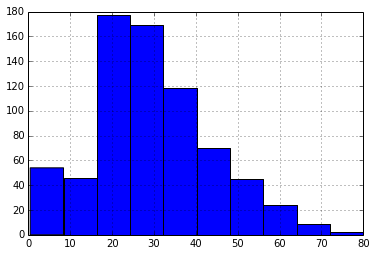

In [219]:
ax = df.age.hist()

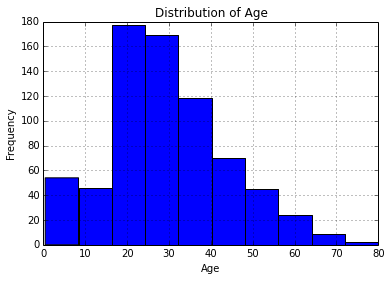

In [220]:
ax = df.age.hist()
_ = ax.set(xlabel='Age',ylabel='Frequency',title='Distribution of Age')


In [221]:
ax.set(xlabel='Age',ylabel='Frequency',title='Distribution of Age')

In [222]:
print df.age.skew()
print df.age.kurtosis()

0.389107782301
0.178274153642


### Explore Fare

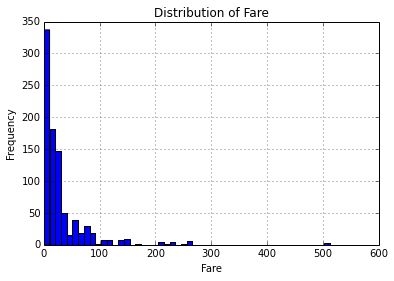

In [223]:
ax = df.fare.hist(bins=50)
_ = ax.set(xlabel='Fare',ylabel='Frequency',title='Distribution of Fare')

In [224]:
print df.fare.skew()
print df.fare.kurtosis()

4.78731651967
33.3981408809


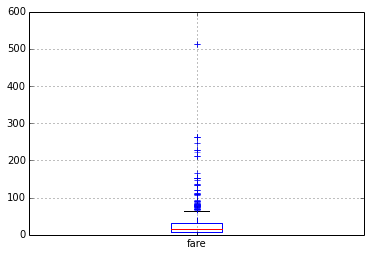

In [225]:
ax = df.boxplot(column='fare',return_type='axes')

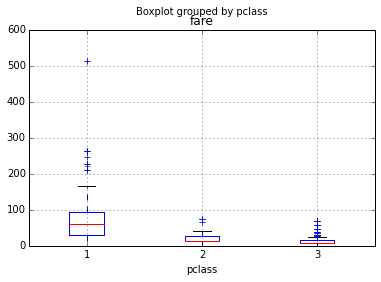

In [226]:
ax = df.boxplot(column='fare',by='pclass')

### Get count of passengers by class

In [227]:
tmp0 = df.pclass.value_counts(sort=False)
tmp0

1    216
2    184
3    491
Name: pclass, dtype: int64

In [228]:
tmp0 = df.groupby('pclass').survived.count()
tmp0

pclass
1    216
2    184
3    491
Name: survived, dtype: int64

In [229]:
tmp0 = df.groupby('pclass').size()
tmp0

pclass
1    216
2    184
3    491
dtype: int64

In [230]:
tmp0 = tmp0.rename('count')
tmp0

pclass
1    216
2    184
3    491
Name: count, dtype: int64

### Get number of survived by class

In [231]:
tmp1 = df.groupby('pclass').survived.sum()
tmp1

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

### Get chance of survival by class

In [232]:
tmp2 = tmp1 / tmp0
tmp2

pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

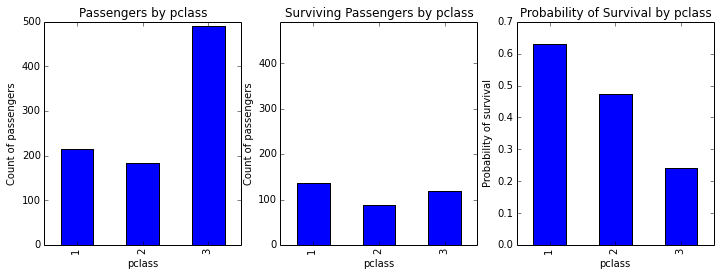

In [233]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
_ = tmp0.plot(kind='bar',ax=ax[0])
_ = tmp1.plot(kind='bar',ax=ax[1],ylim=(0,max(tmp0)))
_ = tmp2.plot(kind='bar',ax=ax[2])
_ = ax[0].set(ylabel='Count of passengers',title='Passengers by pclass')
_ = ax[1].set(ylabel='Count of passengers',title='Surviving Passengers by pclass')
_ = ax[2].set(ylabel='Probability of survival',title='Probability of Survival by pclass')

In [234]:
df2 = pd.DataFrame([tmp0,tmp1])
df2

pclass,1,2,3
count,216,184,491
survived,136,87,119


,count,survived
pclass,,
1,216,136
2,184,87
3,491,119


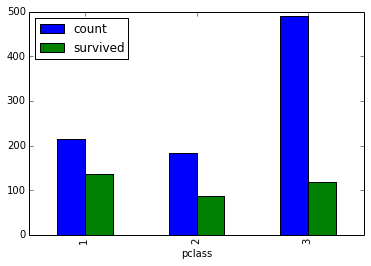

In [235]:
ax = df2.T.plot(kind='bar')
df2.T

### Do the same analysis by sex

In [236]:
tmp0 = df.groupby('sex').survived.count()
tmp0.rename("count", inplace=True)
tmp1 = df.groupby('sex').survived.sum()
tmp2 = tmp1/tmp0

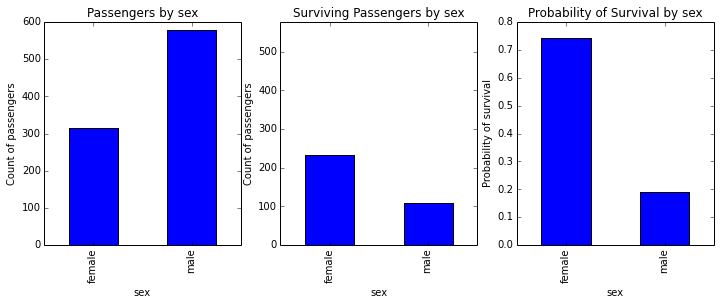

In [237]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
_ = tmp0.plot(kind='bar',ax=ax[0])
_ = tmp1.plot(kind='bar',ax=ax[1],ylim=(0,max(tmp0)))
_ = tmp2.plot(kind='bar',ax=ax[2])
_ = ax[0].set(ylabel='Count of passengers',title='Passengers by sex')
_ = ax[1].set(ylabel='Count of passengers',title='Surviving Passengers by sex')
_ = ax[2].set(ylabel='Probability of survival',title='Probability of Survival by sex')

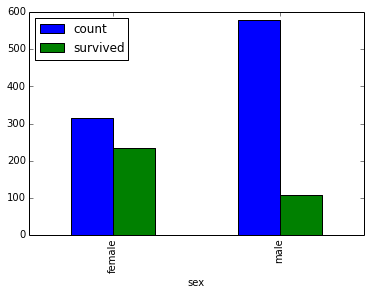

In [238]:
_ = pd.DataFrame([tmp0,tmp1]).T.plot(kind='bar')

### Look at both class and sex

In [239]:
tmp3 = pd.crosstab([df.pclass,df.sex], df.survived.astype(bool))
tmp3

survived       False  True 
pclass sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

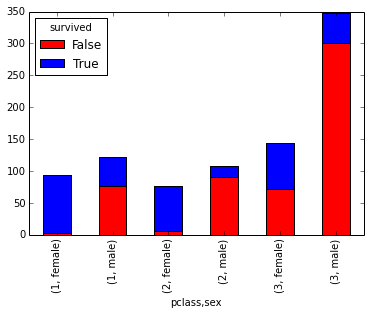

In [240]:
_ = tmp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

### Look at class x sex x embarked

In [241]:
tmp4 = pd.crosstab([df.pclass,df.sex,df.embarked], df.survived.astype(bool))
tmp4

survived                False  True 
pclass sex    embarked              
1      female C             1     42
              Q             0      1
              S             2     46
       male   C            25     17
              Q             1      0
              S            51     28
2      female C             0      7
              Q             0      2
              S             6     61
       male   C             8      2
              Q             1      0
              S            82     15
3      female C             8     15
              Q             9     24
              S            55     33
       male   C            33     10
              Q            36      3
              S           231     34

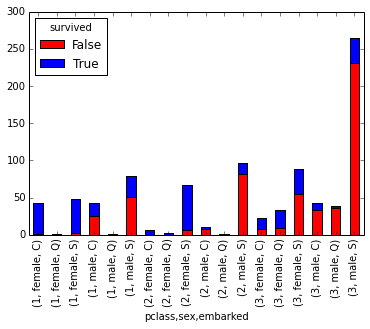

In [242]:
_ = tmp4.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

### Deal with missing and messy values

In [243]:
df.count()

survived    891
pclass      891
name        891
sex         891
age         714
sibsp       891
parch       891
ticket      891
fare        891
cabin       204
embarked    889
dtype: int64

In [244]:
sum(df.cabin.isnull()) / float(len(df))

0.77104377104377109

In [245]:
df.ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

In [246]:
df = df.drop(['ticket','cabin'],axis=1)
df

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [247]:
sum(df.age.isnull()) / float(len(df))

0.19865319865319866

### Deal with missing in age using mean

In [248]:
df.age.fillna(df.age.mean())


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [249]:
df.tail()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q


### Can we infer age? 

In [250]:
df.name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [251]:
def extract_salutation(name):
    return name.split(',')[1].split('.')[0].strip()

In [252]:
df['salutation'] = df.name.apply(extract_salutation)

In [253]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,salutation
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [254]:
tmp1 = df.groupby('salutation').size()
tmp1

salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

In [255]:
def group_salutation(sal):
    if sal in ('Mr','Mrs','Master','Miss'):
        return sal
    else:
        return 'Other'

In [256]:
df['new_salutation'] = df.salutation.apply(group_salutation)

In [257]:
tmp1 = df.groupby('new_salutation').size()
tmp1

new_salutation
Master     40
Miss      182
Mr        517
Mrs       125
Other      27
dtype: int64

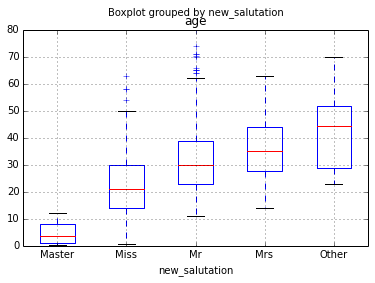

In [258]:
_ = df.boxplot(column='age',by='new_salutation')

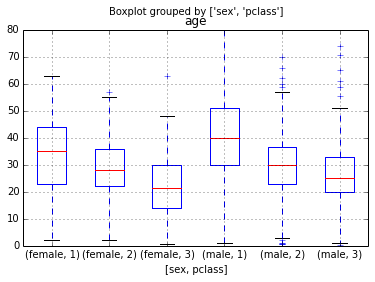

In [259]:
_ = df.boxplot(column='age', by=['sex','pclass'])

In [260]:
ptable = df.pivot_table(values='age', index=['new_salutation'], 
                       columns=['pclass','sex'], aggfunc=np.median)
ptable

pclass              1            2            3      
sex            female  male female  male female  male
new_salutation                                       
Master            NaN   4.0    NaN   1.0    NaN   4.0
Miss             30.0   NaN   24.0   NaN   18.0   NaN
Mr                NaN  40.0    NaN  31.0    NaN  26.0
Mrs              41.5   NaN   32.0   NaN   31.0   NaN
Other            28.5  49.0   28.0  46.5    NaN   NaN

In [261]:
def f_age(x):
    return ptable[x['pclass']][x['sex']][x['new_salutation']]

In [262]:
df.age.fillna(df[df.age.isnull()].apply(f_age,axis=1),inplace=True)

In [263]:
df.age.isnull().sum()

0

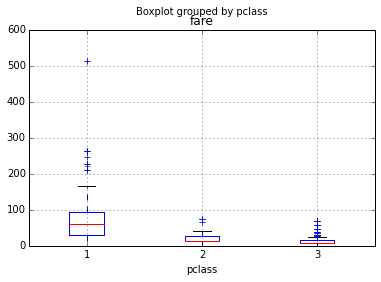

In [264]:
_ = df.boxplot(column='fare', by='pclass')

In [265]:
df.count()

survived          891
pclass            891
name              891
sex               891
age               891
sibsp             891
parch             891
fare              891
embarked          889
salutation        891
new_salutation    891
dtype: int64

In [266]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.149461,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.503296,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [267]:
df.isnull().sum()

survived          0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          2
salutation        0
new_salutation    0
dtype: int64

### Drop outliers in age

In [268]:
from scipy import stats

In [269]:
df.ix[(np.abs(stats.zscore(df.age)) > 3),:]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,salutation,new_salutation
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,C,Mr,Mr
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,Q,Mr,Mr
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,C,Mr,Mr
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,S,Mr,Mr
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,10.5000,S,Mr,Mr
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.0000,S,Capt,Other
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,S,Mr,Mr


In [270]:
df2 = df.drop(df.ix[(np.abs(stats.zscore(df.age)) > 3),:].index)

In [271]:
print df.age.describe()

count    891.000000
mean      29.149461
std       13.503296
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: age, dtype: float64


In [272]:
print df2.age.describe()

count    884.000000
mean      28.807319
std       12.991440
min        0.420000
25%       21.000000
50%       26.000000
75%       36.000000
max       66.000000
Name: age, dtype: float64


In [273]:
df2.shape

(884, 11)

### Drop outliers in fare by class

In [274]:
df2['zfare'] = df2.groupby(['pclass']).fare.transform(stats.zscore)

In [275]:
np.mean(df2.fare)

32.220323416289588

In [276]:
np.mean(df2.zfare)

4.822688251765386e-17

In [277]:
df2.groupby('pclass').zfare.mean()

pclass
1    1.298751e-16
2    1.971708e-16
3   -6.629553e-17
Name: zfare, dtype: float64

In [278]:
df2.ix[np.abs(df2.zfare) > 3]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,salutation,new_salutation,zfare
72,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,73.5000,S,Mr,Mr,3.940083
74,1,3,"Bing, Mr. Lee",male,32.0,0,0,56.4958,S,Mr,Mr,3.631683
120,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,73.5000,S,Mr,Mr,3.940083
159,0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,69.5500,S,Master,Master,4.739465
169,0,3,"Ling, Mr. Lee",male,28.0,0,0,56.4958,S,Mr,Mr,3.631683
180,0,3,"Sage, Miss. Constance Gladys",female,18.0,8,2,69.5500,S,Miss,Miss,4.739465
201,0,3,"Sage, Mr. Frederick",male,26.0,8,2,69.5500,S,Mr,Mr,4.739465
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C,Miss,Miss,5.429608
324,0,3,"Sage, Mr. George John Jr",male,26.0,8,2,69.5500,S,Mr,Mr,4.739465
385,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,73.5000,S,Mr,Mr,3.940083


In [279]:
df3 = df2.drop(df2.ix[(np.abs(df2.zfare) > 3),:].index)
df3

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,salutation,new_salutation,zfare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,Mr,-0.547326
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,Mrs,-0.172567
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,Miss,-0.490045
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,Mrs,-0.403532
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,Mr,-0.479438
5,0,3,"Moran, Mr. James",male,26.0,0,0,8.4583,Q,Mr,Mr,-0.444789
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr,Mr,-0.419251
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master,Master,0.625866
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs,Mrs,-0.217788
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs,Mrs,0.698187


In [280]:
df3 = df3.drop(['salutation'],axis=1)

In [281]:
df3

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,new_salutation,zfare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,-0.547326
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,-0.172567
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,-0.490045
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,-0.403532
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,-0.479438
5,0,3,"Moran, Mr. James",male,26.0,0,0,8.4583,Q,Mr,-0.444789
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr,-0.419251
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master,0.625866
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs,-0.217788
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs,0.698187


In [282]:
dum = pd.get_dummies(df.new_salutation).iloc[:,:-1]
dum

,Master,Miss,Mr,Mrs
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0


In [283]:
df4 = df3.merge?

In [ ]:
df4 = df3.merge

In [284]:
df4 = df3.merge(dum,left_index=True,right_index = True)

In [285]:
df4

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,new_salutation,zfare,Master,Miss,Mr,Mrs
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,-0.547326,0.0,0.0,1.0,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,-0.172567,0.0,0.0,0.0,1.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,-0.490045,0.0,1.0,0.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,-0.403532,0.0,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,-0.479438,0.0,0.0,1.0,0.0
5,0,3,"Moran, Mr. James",male,26.0,0,0,8.4583,Q,Mr,-0.444789,0.0,0.0,1.0,0.0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr,-0.419251,0.0,0.0,1.0,0.0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master,0.625866,1.0,0.0,0.0,0.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs,-0.217788,0.0,0.0,0.0,1.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs,0.698187,0.0,0.0,0.0,1.0


In [204]:
def encode_sex(s):
    if s == 'male':
        return 0
    else:
        return 1

In [286]:
df4['sex_encoded'] = df4.sex.apply(encode_sex)

In [287]:
df4.sex_encoded

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
860    0
861    0
862    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: sex_encoded, dtype: int64